In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Andrews 曲线

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


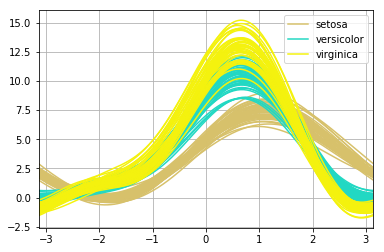

In [14]:
from pandas.tools.plotting import andrews_curves
plt.figure()
andrews_curves(data, "species")

## 平行坐标
平行坐标也是一种多维可视化技术。它可以看到数据中的类别以及从视觉上估计其他的统计量。使用平行坐标时，每个点用线段联接。每个垂直的线代表一个属性。一组联接的线段表示一个数据点。可能是一类的数据点会更加接近。

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


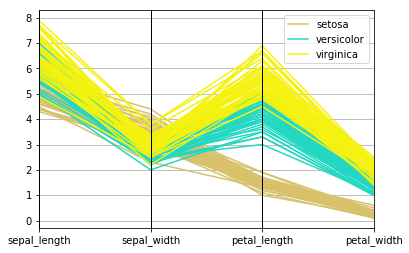

In [15]:
from pandas.tools.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(data, "species")

## RadViz（雷达图？）
RadViz是一种可视化多维数据的方式。它基于基本的弹簧压力最小化算法（在复杂网络分析中也会经常应用）。简单来说，将一组点放在一个平面上，每一个点代表一个属性，我们案例中有四个点，被放在一个单位圆上，接下来你可以设想每个数据集通过一个弹簧联接到每个点上，弹力和他们属性值成正比（属性值已经标准化），数据集在平面上的位置是弹簧的均衡位置。不同类的样本用不同颜色表示。

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


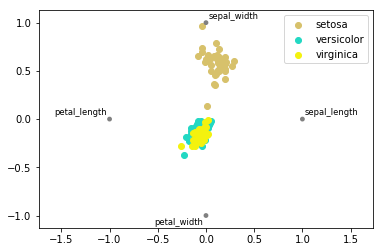

In [16]:
from pandas.tools.plotting import radviz
plt.figure()
radviz(data, "species")

## 因素分析(FactorAnalysis, FA)
因素分析最初心理学家斯皮尔曼发明，用于研究人类的人格特质，著名的卡特尔16PF（16种相对独立的人格特征）就是应用因素分析方法得来。基于高斯潜在变量的一个简单线性模型，假设每一个观察值都是由低维的潜在变量加正态噪音构成。

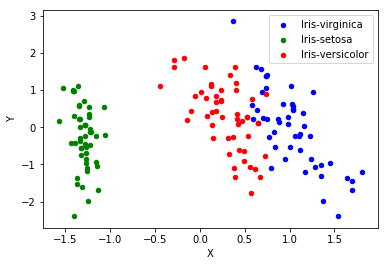

In [39]:
from sklearn import decomposition

pca = decomposition.FactorAnalysis(n_components=2)

X = pca.fit_transform(data.ix[:,:-1].values)

pos=pd.DataFrame()

pos['X'] =X[:, 0]

pos['Y'] =X[:, 1]

pos['Name'] = data['species']

ax = pos.loc[pos['Name']=='virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')

ax = pos.loc[pos['Name']=='setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)

pos.loc[pos['Name']=='versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)


## 主成分分析（PCA）
主成分分析是由因子分析进化而来的一种降维的方法，通过正交变换将原始特征转换为线性独立的特征，转换后得到的特征被称为主成分。主成分分析可以将原始维度降维到n个维度，有一个特例情况，就是通过主成分分析将维度降低为2维，这样的话，就可以将多维数据转换为平面中的点，来达到多维数据可视化的目的。

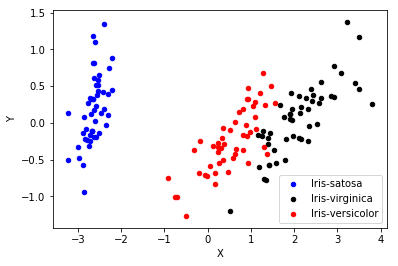

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = pca.fit_transform(data.iloc[:, :-1].values)

pos = pd.DataFrame()
pos["X"] = X[:,0]
pos["Y"] = X[:, 1]
pos["Name"] = data["species"]

ax = pos.loc[pos["Name"] == "setosa"].plot(kind="scatter", x="X", y="Y",color="blue", label="Iris-satosa")
ax = pos.loc[pos['Name']=='virginica'].plot(kind='scatter', x='X', y='Y', color='black', label='Iris-virginica', ax=ax)

pos.loc[pos['Name']=='versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)


### 需要注意，通过PCA降维实际上是损失了一些信息，我们也可以看一下保留的两个主成分可以解释原始数据的多少。

In [57]:
pca.fit(data.iloc[:,:-1].values).explained_variance_ratio_

array([ 0.92461621,  0.05301557])

###  可以看到保留的两个主成分，第一个主成分可以解释原始变异的92.3%，第二个主成分可以解释原始变异的5.3%。也就是说降成两维后仍保留了原始信息的97.8%。

### 独立成分分析(ICA)
独立成分分析将多源信号拆分成最大可能独立性的子成分，它最初不是用来降维，而是用于拆分重叠的信号。

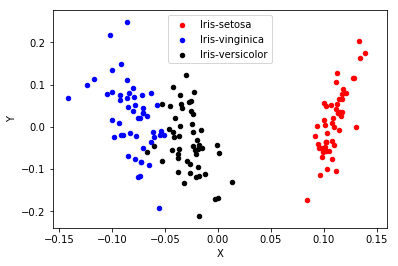

In [67]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)

X = ica.fit_transform(data.iloc[:, :-1].values)

pos = pd.DataFrame()
pos["X"] = X[:,0]
pos["Y"] = X[:, 1]
pos["Name"] = data["species"]

ax = pos.loc[pos["Name"] == "setosa"].plot(kind="scatter", x="X", y="Y", color="red", label="Iris-setosa")
ax = pos.loc[pos["Name"] == "virginica"].plot(kind="scatter", x="X",y="Y", color="blue", label="Iris-vinginica", ax=ax)
pos.loc[pos["Name"] == "versicolor"].plot(kind="scatter", x="X", y="Y", color="black", label="Iris-versicolor", ax=ax)

## 多维度量尺（Multi-dimensional scaling, MDS）
多维量表试图寻找原始高维空间数据的距离的良好低维表征。简单来说，多维度量尺被用于数据的相似性，它试图用几何空间中的距离来建模数据的相似性，直白来说就是用二维空间中的距离来表示高维空间的关系。数据可以是物体之间的相似度、分子之间的交互频率或国家间交易指数。这一点与前面的方法不同，前面的方法的输入都是原始数据，而在多维度量尺的例子中，输入是基于欧式距离的距离矩阵。多维度量尺算法是一个不断迭代的过程，因此，需要使用max_iter来指定最大迭代次数，同时计算的耗时也是上面算法中最大的一个。

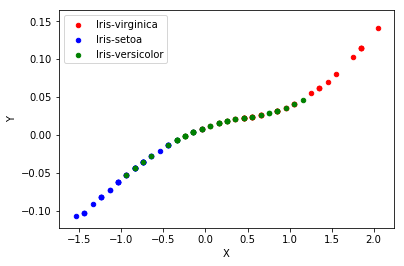

In [75]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

similarities = euclidean_distances(data.iloc[:, :1].values)

mds = MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed",
         n_jobs=-1)

X = mds.fit(similarities).embedding_

pos = pd.DataFrame(X, columns=["X", "Y"])

pos["Name"] = data["species"]

ax = pos.loc[pos["Name"] == "virginica"].plot(kind="scatter",x="X", y="Y", color="red", label="Iris-virginica")

ax = pos.loc[pos["Name"] == "setosa"].plot(kind="scatter", x="X", y="Y",color="blue", label="Iris-setoa", ax=ax)

pos.loc[pos["Name"] == "versicolor"].plot(kind="scatter", x="X", y="Y", color="green", label="Iris-versicolor", ax=ax)